In [1]:
# For data manipulation and analysis
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# --- Block 2: Load Data ---

trader_data_path = 'csv_files/historical_data.csv'
sentiment_data_path = 'csv_files/fear_greed_index.csv'

# Loading the datasets using the local paths
try:
    trader_df = pd.read_csv(trader_data_path)
    sentiment_df = pd.read_csv(sentiment_data_path)

    print("Datasets loaded successfully from local machine!")
    
    print("\nTrader Data:")
    display(trader_df.head())
    
    print("\nSentiment Data:")
    display(sentiment_df.head())

except FileNotFoundError as e:
    print(f"Error: {e}")
    print("Please make sure that the file names are correct and that your notebook is in the 'ds_gyangupta' folder.")

Datasets loaded successfully from local machine!

Trader Data:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12



Sentiment Data:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [5]:
# --- Block 3: Initial Inspection ---

# Inspect the Trader Data
print("--- Trader Data Inspection ---")
trader_df.info()

print("\nMissing values in Trader Data:")
print(trader_df.isnull().sum())

print("\nStatistical summary of Trader Data:")
display(trader_df.describe())


# Inspect the Sentiment Data
print("\n\n--- Sentiment Data Inspection ---")
sentiment_df.info()

print("\nMissing values in Sentiment Data:")
print(sentiment_df.isnull().sum())

print("\nStatistical summary of Sentiment Data:")
display(sentiment_df.describe())

--- Trader Data Inspection ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  fl

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12




--- Sentiment Data Inspection ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB

Missing values in Sentiment Data:
timestamp         0
value             0
classification    0
date              0
dtype: int64

Statistical summary of Sentiment Data:


,timestamp,value
count,2.644000e+03,2644.000000
mean,1.631899e+09,46.981089
std,6.597967e+07,21.827680
min,1.517463e+09,5.000000
25%,1.574811e+09,28.000000
50%,1.631900e+09,46.000000
75%,1.688989e+09,66.000000
max,1.746164e+09,95.000000


In [6]:
# --- Block 4: Clean Trader Data ---

# Convert 'Timestamp IST' to a proper datetime format
trader_df['datetime'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M')

# Extract just the date part, which we will use to merge with the sentiment data
trader_df['date'] = trader_df['datetime'].dt.date

# Drop columns that are not needed for the analysis to simplify the DataFrame
columns_to_drop = ['Timestamp IST', 'Transaction Hash', 'Order ID', 'Trade ID', 'Timestamp']
trader_df_cleaned = trader_df.drop(columns=columns_to_drop)

print("Trader Data Cleaned. 'date' column created.")
display(trader_df_cleaned.head())

Trader Data Cleaned. 'date' column created.


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Crossed,Fee,datetime,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,0.000000,Buy,0.0,True,0.345404,2024-12-02 22:50:00,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,986.524596,Buy,0.0,True,0.005600,2024-12-02 22:50:00,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,1002.518996,Buy,0.0,True,0.050431,2024-12-02 22:50:00,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,1146.558564,Buy,0.0,True,0.050043,2024-12-02 22:50:00,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,1289.488521,Buy,0.0,True,0.003055,2024-12-02 22:50:00,2024-12-02


In [7]:
# --- Block 5: Clean Sentiment Data ---

# First, let's see all the unique sentiment classifications
print(f"Original sentiment classifications: {sentiment_df['classification'].unique()}")

# Simplify the classifications. We'll group 'Extreme Fear' with 'Fear' and 'Extreme Greed' with 'Greed'.
sentiment_df['sentiment'] = sentiment_df['classification'].replace({
    'Extreme Fear': 'Fear',
    'Extreme Greed': 'Greed'
})

# Convert the 'date' column to datetime objects to ensure a clean merge
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date

# Select only the columns we need for the final analysis: 'date' and the new 'sentiment'
sentiment_df_cleaned = sentiment_df[['date', 'sentiment']]

print(f"\nSimplified sentiment classifications: {sentiment_df_cleaned['sentiment'].unique()}")
print("\nSentiment Data Cleaned and Simplified.")
display(sentiment_df_cleaned.head())

Original sentiment classifications: ['Fear' 'Extreme Fear' 'Neutral' 'Greed' 'Extreme Greed']

Simplified sentiment classifications: ['Fear' 'Neutral' 'Greed']

Sentiment Data Cleaned and Simplified.


,date,sentiment
0,2018-02-01,Fear
1,2018-02-02,Fear
2,2018-02-03,Fear
3,2018-02-04,Fear
4,2018-02-05,Fear


In [8]:
# --- Block 6 & 7: Merge and Verify ---

# Merge the two dataframes on the 'date' column
merged_df = pd.merge(trader_df_cleaned, sentiment_df_cleaned, on='date', how='left')

print("--- DataFrames merged successfully ---")
display(merged_df.head())

print("\n--- Verifying the merged data ---")
merged_df.info()

print("\n--- Checking for missing sentiment values after merge ---")
# This check is important. It tells us if any trades occurred on dates
# that were not present in our sentiment dataset.
print(f"Total missing sentiment values: {merged_df['sentiment'].isnull().sum()}")

--- DataFrames merged successfully ---


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Crossed,Fee,datetime,date,sentiment
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,0.000000,Buy,0.0,True,0.345404,2024-12-02 22:50:00,2024-12-02,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,986.524596,Buy,0.0,True,0.005600,2024-12-02 22:50:00,2024-12-02,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,1002.518996,Buy,0.0,True,0.050431,2024-12-02 22:50:00,2024-12-02,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,1146.558564,Buy,0.0,True,0.050043,2024-12-02 22:50:00,2024-12-02,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,1289.488521,Buy,0.0,True,0.003055,2024-12-02 22:50:00,2024-12-02,Greed



--- Verifying the merged data ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Account          211224 non-null  object        
 1   Coin             211224 non-null  object        
 2   Execution Price  211224 non-null  float64       
 3   Size Tokens      211224 non-null  float64       
 4   Size USD         211224 non-null  float64       
 5   Side             211224 non-null  object        
 6   Start Position   211224 non-null  float64       
 7   Direction        211224 non-null  object        
 8   Closed PnL       211224 non-null  float64       
 9   Crossed          211224 non-null  bool          
 10  Fee              211224 non-null  float64       
 11  datetime         211224 non-null  datetime64[ns]
 12  date             211224 non-null  object        
 13  sentiment        211218 non-null  objec

In [9]:
# --- Block 8: Final Cleanup ---

# Drop the few rows where sentiment is missing
final_df = merged_df.dropna(subset=['sentiment'])

print("Rows with missing sentiment dropped.")
print(f"Remaining rows: {len(final_df)}")

Rows with missing sentiment dropped.
Remaining rows: 211218


--- Volume Analysis (in USD) ---


,sum,mean
sentiment,,
Fear,5.978091e+08,7182.011019
Greed,4.130477e+08,4574.424490
Neutral,1.802421e+08,4782.732661


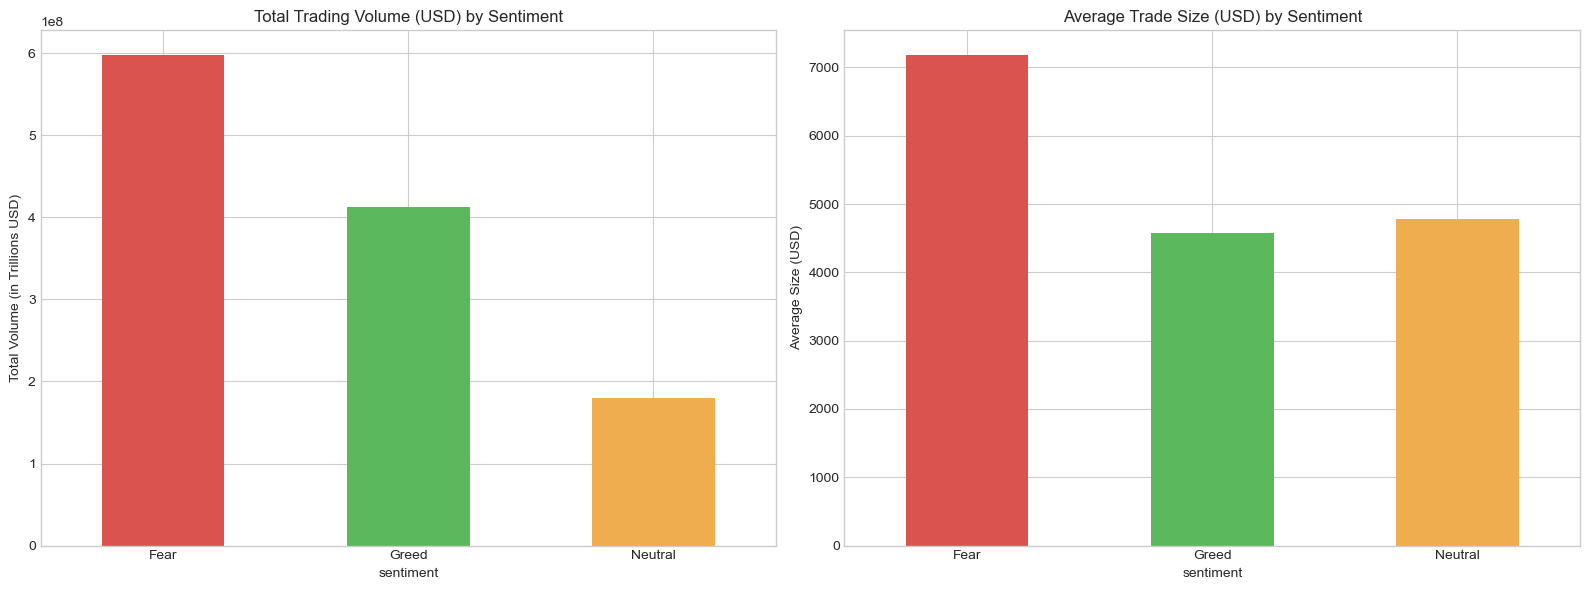

In [10]:
# --- Block 9: Analyze Trading Volume ---

# Group by sentiment and calculate total and average trade volume
volume_analysis = final_df.groupby('sentiment')['Size USD'].agg(['sum', 'mean'])

print("--- Volume Analysis (in USD) ---")
display(volume_analysis)

# --- Visualize the Volume ---
# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot Total Volume
volume_analysis['sum'].plot(kind='bar', ax=ax[0], color=['#d9534f', '#5cb85c', '#f0ad4e'])
ax[0].set_title('Total Trading Volume (USD) by Sentiment')
ax[0].set_ylabel('Total Volume (in Trillions USD)')
ax[0].tick_params(axis='x', rotation=0)

# Plot Average Trade Size
volume_analysis['mean'].plot(kind='bar', ax=ax[1], color=['#d9534f', '#5cb85c', '#f0ad4e'])
ax[1].set_title('Average Trade Size (USD) by Sentiment')
ax[1].set_ylabel('Average Size (USD)')
ax[1].tick_params(axis='x', rotation=0)

plt.tight_layout()

# Save the plot to the outputs folder
plt.savefig('outputs/volume_vs_sentiment.png')

plt.show()

--- Statistical Summary of Closed PnL by Sentiment ---


,count,mean,std,min,25%,50%,75%,max
sentiment,,,,,,,,
Fear,83237.0,49.212077,990.875398,-35681.74723,0.0,0.0,5.607450,135329.09010
Greed,90295.0,53.882281,976.964281,-117990.10410,0.0,0.0,7.037693,74530.52371
Neutral,37686.0,34.307718,517.122220,-24500.00000,0.0,0.0,3.995795,48504.09555


C:\Users\gyang\AppData\Local\Temp\ipykernel_16568\1181536677.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=final_df, x='sentiment', y='Closed PnL', palette=['#d9534f', '#5cb85c', '#f0ad4e'])


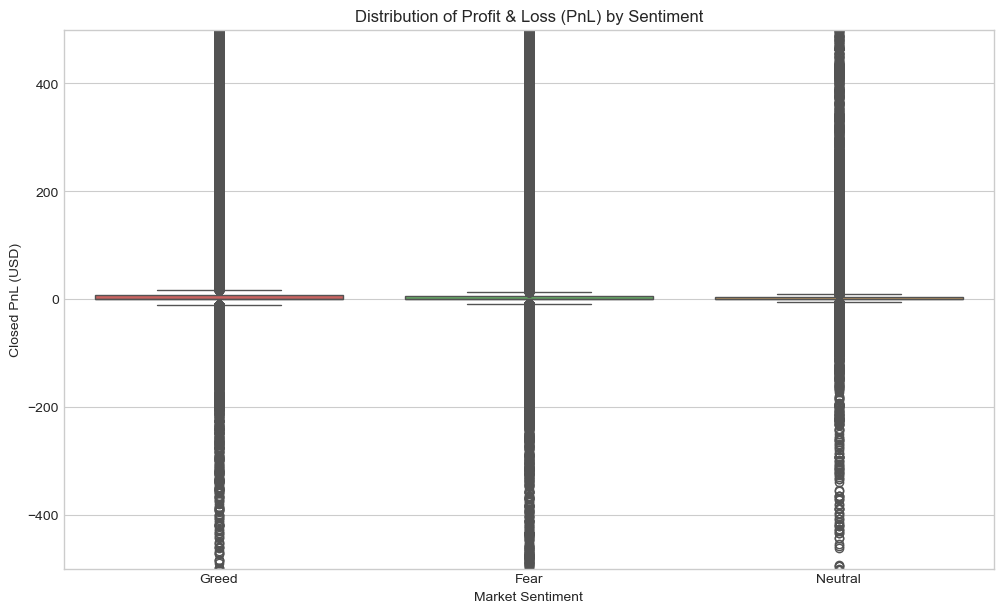

In [11]:
# --- Block 10: Analyze Profitability ---

print("--- Statistical Summary of Closed PnL by Sentiment ---")
display(final_df.groupby('sentiment')['Closed PnL'].describe())


# --- Visualize the PnL Distribution ---
plt.figure(figsize=(12, 7))

# A boxplot is excellent for visualizing distributions and identifying outliers
sns.boxplot(data=final_df, x='sentiment', y='Closed PnL', palette=['#d9534f', '#5cb85c', '#f0ad4e'])

# To make the plot readable, we can limit the y-axis to focus on the bulk of the data
# You can adjust these limits based on your findings
plt.ylim(-500, 500) # Limiting to +/- $500 to see the box distribution clearly

plt.title('Distribution of Profit & Loss (PnL) by Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Closed PnL (USD)')

# Save the plot to the outputs folder
plt.savefig('outputs/pnl_vs_sentiment.png')

plt.show()

--- Proportions of Buy vs. Sell Trades ---


Side,BUY,SELL
sentiment,,
Fear,0.495032,0.504968
Greed,0.470857,0.529143
Neutral,0.503343,0.496657


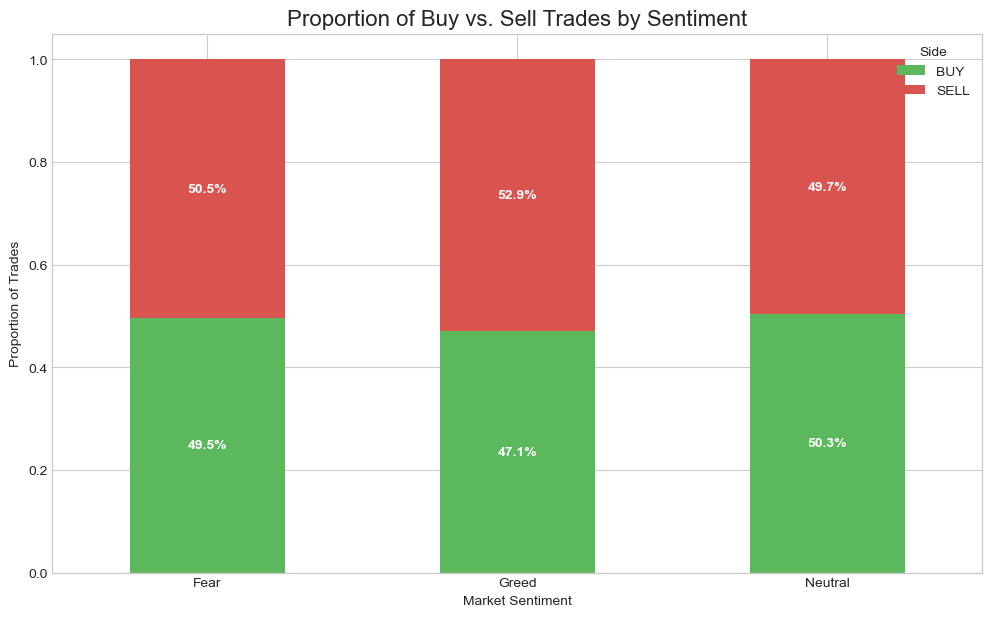

In [12]:
# --- Block 11: Analyze Buy vs. Sell Proportions ---

# Group by sentiment and side, then count the number of trades
behavior_counts = final_df.groupby(['sentiment', 'Side']).size().unstack(fill_value=0)

# Calculate the proportion (percentage) of each side within each sentiment
behavior_proportions = behavior_counts.div(behavior_counts.sum(axis=1), axis=0)

print("--- Proportions of Buy vs. Sell Trades ---")
display(behavior_proportions)

# --- Visualize the Proportions ---
# A stacked bar chart is perfect for showing proportions
ax = behavior_proportions.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 7),
    color=['#5cb85c', '#d9534f'] # Green for BUY, Red for SELL
)

plt.title('Proportion of Buy vs. Sell Trades by Sentiment', fontsize=16)
plt.ylabel('Proportion of Trades')
plt.xlabel('Market Sentiment')
plt.xticks(rotation=0)
plt.legend(title='Side')

# Add percentage labels to the bars
for c in ax.containers:
    labels = [f'{w*100:0.1f}%' for w in c.datavalues]
    ax.bar_label(c, labels=labels, label_type='center', color='white', weight='bold')

# Save the high-quality plot to the outputs folder
plt.savefig('outputs/behavior_proportions.png', dpi=300)

plt.show()

In [13]:
# --- Block 12: Inspect Available Coins ---

# Check the most traded coins in the dataset
top_coins = final_df['Coin'].value_counts().head(10)

print("--- Top 10 Most Traded Coins ---")
display(top_coins)

--- Top 10 Most Traded Coins ---


Coin
HYPE         68005
@107         29992
BTC          26064
ETH          11158
SOL          10691
FARTCOIN      4650
MELANIA       4428
PURR/USDC     2774
WLD           1983
SUI           1979
Name: count, dtype: int64

--- Statistical Summary of Closed PnL for BTC ---


,count,mean,std,min,25%,50%,75%,max
sentiment,,,,,,,,
Fear,11635.0,41.745293,608.327581,-29370.11980,0.0,0.0,3.099785,19530.522500
Greed,9676.0,22.360263,404.943293,-25818.75012,0.0,0.0,0.700486,8633.812548
Neutral,4753.0,34.921175,528.214163,-18993.46842,0.0,0.0,1.214710,18022.958400


C:\Users\gyang\AppData\Local\Temp\ipykernel_16568\1786757564.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=coin_df, x='sentiment', y='Closed PnL', palette=['#d9534f', '#5cb85c', '#f0ad4e'])


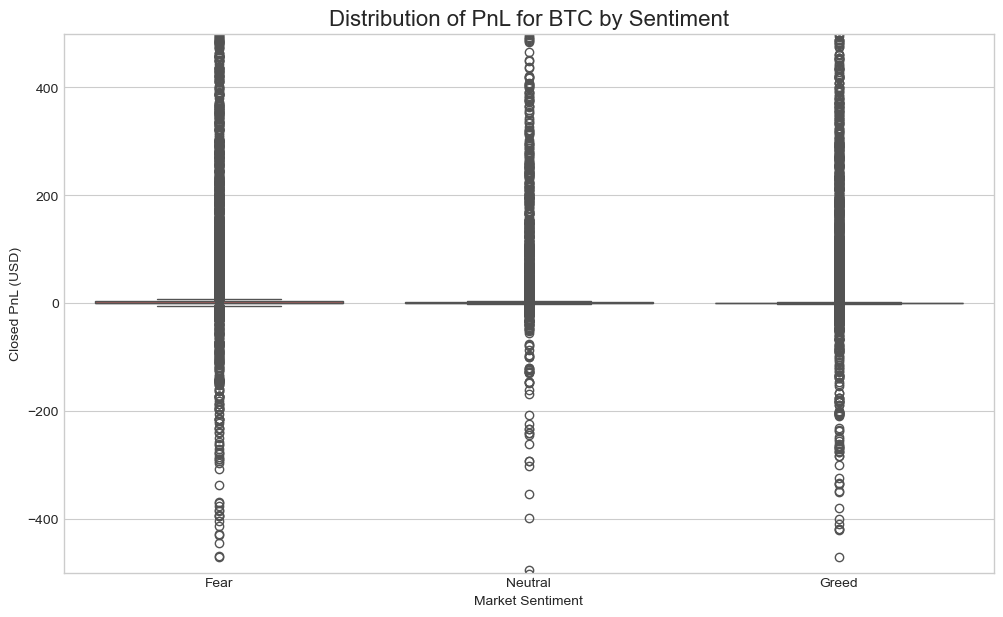

In [14]:
# --- Block 13: Focused PnL Analysis on BTC ---

# We'll use 'BTC' for this analysis based on the list you generated.
# You can change this to another coin like 'ETH' or 'SOL' if you wish.
COIN_TO_ANALYZE = 'BTC'

# Filter the DataFrame for only BTC trades
coin_df = final_df[final_df['Coin'] == COIN_TO_ANALYZE].copy()

print(f"--- Statistical Summary of Closed PnL for {COIN_TO_ANALYZE} ---")
display(coin_df.groupby('sentiment')['Closed PnL'].describe())

# --- Visualize the PnL Distribution for BTC ---
plt.figure(figsize=(12, 7))

sns.boxplot(data=coin_df, x='sentiment', y='Closed PnL', palette=['#d9534f', '#5cb85c', '#f0ad4e'])

# We will adjust the y-axis limits to zoom in on the main distribution of PnL data.
# This helps in visualizing the box plot clearly, otherwise, outliers can skew the view.
plt.ylim(-500, 500)

plt.title(f'Distribution of PnL for {COIN_TO_ANALYZE} by Sentiment', fontsize=16)
plt.xlabel('Market Sentiment')
plt.ylabel('Closed PnL (USD)')

# Save the high-quality plot to the outputs folder
plt.savefig(f'outputs/pnl_vs_sentiment_{COIN_TO_ANALYZE}.png', dpi=300)

plt.show()


C:\Users\gyang\AppData\Local\Temp\ipykernel_16568\1530892897.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pnl_over_time = final_df.set_index('datetime').resample('M')['Closed PnL'].mean()


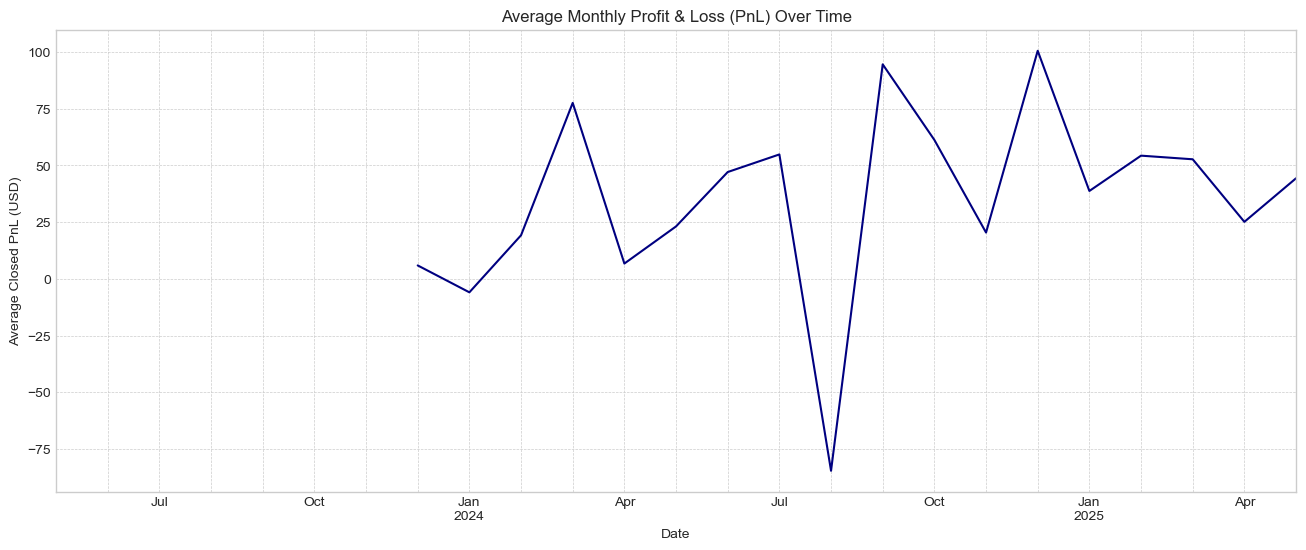

In [15]:
# --- Optional Block: PnL Over Time ---

# Resample data by month and calculate the mean PnL
pnl_over_time = final_df.set_index('datetime').resample('M')['Closed PnL'].mean()

plt.figure(figsize=(16, 6))
pnl_over_time.plot(title='Average Monthly Profit & Loss (PnL) Over Time', color='navy')
plt.ylabel('Average Closed PnL (USD)')
plt.xlabel('Date')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Save the plot
plt.savefig('outputs/pnl_over_time.png', dpi=300)

plt.show()

--- Fee Analysis ---


,count,mean,std,min,25%,50%,75%,max
sentiment,,,,,,,,
Fear,83237.0,1.397763,7.775864,0.000000,0.020040,0.116451,0.498786,754.307241
Greed,90295.0,0.998166,5.160557,-1.175712,0.013578,0.072687,0.334604,299.999568
Neutral,37686.0,1.044798,7.647710,-1.000001,0.017608,0.089902,0.392827,837.471593


C:\Users\gyang\AppData\Local\Temp\ipykernel_16568\4166488277.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=final_df, x='sentiment', y='Fee', palette=['#d9534f', '#5cb85c', '#f0ad4e'])


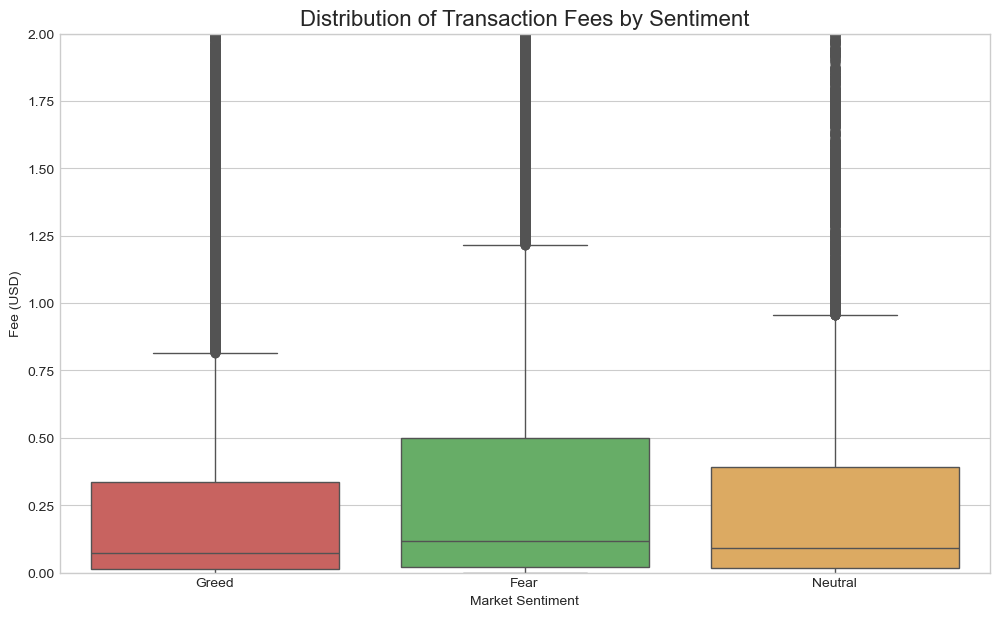

In [16]:
# --- Optional Block: Fee Analysis ---

# Group by sentiment and analyze the Fee column
fee_analysis = final_df.groupby('sentiment')['Fee'].describe()

print("--- Fee Analysis ---")
display(fee_analysis)

# Visualize the fee distribution
plt.figure(figsize=(12, 7))
sns.boxplot(data=final_df, x='sentiment', y='Fee', palette=['#d9534f', '#5cb85c', '#f0ad4e'])
plt.title('Distribution of Transaction Fees by Sentiment', fontsize=16)
plt.ylabel('Fee (USD)')
plt.xlabel('Market Sentiment')
plt.ylim(0, 2) # Adjust limit to focus on the main distribution

# Save the plot
plt.savefig('outputs/fee_distribution.png', dpi=300)

plt.show()